## CNN Model for MNIST Handwritten Digit Classification

- This notebook implements a Convolutional Neural Network (CNN) using Keras to classify handwritten digits from the MNIST dataset.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.datasets import mnist
# from keras.optimizers import Adam
# from keras.losses import SparseCategoricalCrossentropy

## Load and Visualize the Dataset

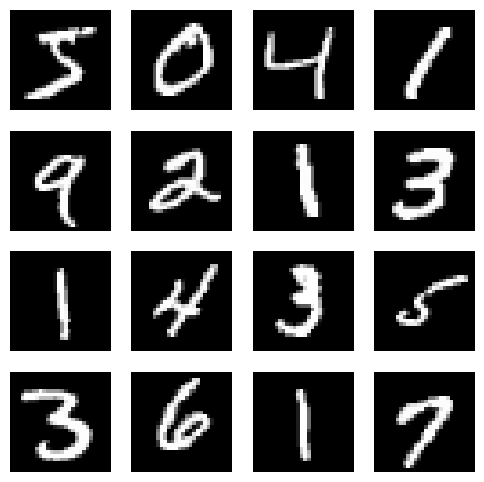

In [2]:
(trainImages, trainLabels), (testImages, testLabels) = mnist.load_data()

def show_images(images):
    plt.figure(figsize=(6, 6))
    for i in range(16):
        plt.subplot(4, 4, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.axis('off')
    plt.show()

show_images(trainImages)

In [4]:
trainImages.shape, testImages.shape

((60000, 28, 28), (10000, 28, 28))

In [5]:
model = Sequential()

model.add(Conv2D(6, kernel_size=(3,3), input_shape=(28,28,1), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(12, kernel_size=(3,3), activation='relu', padding='same'))
model.add(Conv2D(24, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(36, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(48, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

c:\Users\PC\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 6)      │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 12)     │           660 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 24)     │         2,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 10, 10, 36)     │         7,812 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 48)       │        15,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 48)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 768)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │        76,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,208 (426.59 KB)

 Trainable params: 109,208 (426.59 KB)

 Non-trainable params: 0 (0.00 B)

### Compile and Train the Model

In [6]:
model.compile(loss='SparseCategoricalCrossentropy', optimizer = 'adam', metrics=['accuracy',])

In [8]:
epochs = 15
batchSize = 128

In [9]:
history = model.fit(trainImages, trainLabels, epochs=epochs, batch_size=batchSize)

Epoch 1/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 22s 33ms/step - accuracy: 0.8253 - loss: 0.9519
Epoch 2/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.9787 - loss: 0.0677
Epoch 3/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - accuracy: 0.9854 - loss: 0.0454
Epoch 4/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 37ms/step - accuracy: 0.9906 - loss: 0.0290
Epoch 5/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.9922 - loss: 0.0243
Epoch 6/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - accuracy: 0.9936 - loss: 0.0201
Epoch 7/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.9937 - loss: 0.0193
Epoch 8/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 41ms/step - accuracy: 0.9940 - loss: 0.0176
Epoch 9/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 37ms/step - accuracy: 0.9942 - loss: 0.0172
Epoch 10/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.9955 - loss: 0.0137
Epoch 11/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.9949 - loss: 0.0154
Epoch 12/15
469/469 ━━━━━━━━━━

### Evaluate the Model

In [10]:
model.evaluate(testImages, testLabels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9874 - loss: 0.0530


[0.042708683758974075, 0.9896000027656555]

In [11]:
preds = model.predict(testImages)
print(f"Total Predictions: {len(preds)}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
Total Predictions: 10000


### Test with an External Image

In [12]:
img = cv2.imread('./image1.png', 0)
plt.imshow(img, cmap='gray')

resizedImg = cv2.resize(img, (28, 28))
extendedImage = np.expand_dims(resizedImg, axis=0)

result = model.predict(extendedImage)
predicted_class = np.argmax(result, axis=1)
print(f"Predicted Class: {predicted_class[0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Predicted Class: 3


### Plot Training Performance

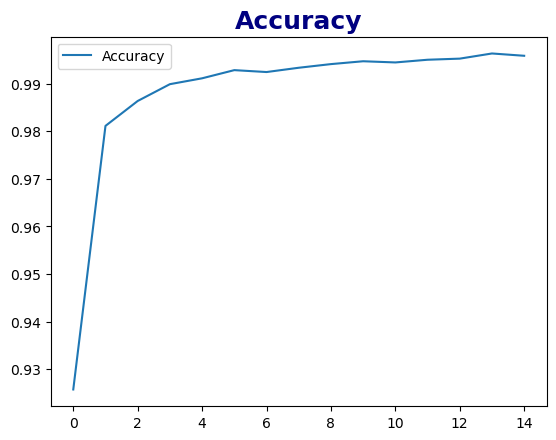

In [13]:
plt.plot(history.history['accuracy'], label="Accuracy")
plt.title("Accuracy", fontweight="bold", fontsize="18", color="navy")
plt.legend()
plt.show()

In [14]:
plt.plot(history.history['loss'], label="Loss")
plt.title("Loss", fontweight="bold", fontsize="18", color="navy")
plt.legend()
plt.show()

### Save and Load the Model

In [15]:
model.save('model.h5')

loadedModel = load_model('model.h5')
loadedModel.predict(extendedImage)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step


array([[1.4360176e-14, 9.8556410e-14, 1.7765713e-12, 9.9999952e-01,
        7.2398333e-12, 4.5988014e-07, 4.2834252e-12, 1.3286205e-15,
        6.6087244e-12, 5.2258131e-10]], dtype=float32)

---
## Visualize the implemented model
![Image](Model.jpg)

| Layer           | Depth | Width | Height | Filter (w) | Filter (h) |
|-----------------|-------|-------|--------|------------|------------|
| input           |   1   |  28   |   28   |     -      |     -      |
| Conv2D_1        |   6   |  28   |   28   |     3      |     3      |
| MaxPooling2D_1  |   6   |  14   |   14   |     2      |     2      |
| Conv2D_2        |  12   |  14   |   14   |     3      |     3      |
| Conv2D_3        |  24   |  12   |   12   |     3      |     3      |
| Conv2D_4        |  36   |  10   |   10   |     3      |     3      |
| Conv2D_5        |  48   |   8   |    8   |     3      |     3      |
| MaxPooling2D_2  |  48   |   4   |    4   |     2      |     2      |
| Flatten         | 768   |   1   |    1   |     -      |     -      |
| Dense_1         | 100   |   1   |    1   |     -      |     -      |
| Dense_2         |  50   |   1   |    1   |     -      |     -      |
| Dense_3         |  10   |   1   |    1   |     -      |     -      |


---